In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\SUMIT PRAJAPATI\Documents\analatics file\IPL Dataset.csv")
df

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,runs_off_bat,extras,wides,noballs,byes,legbyes,wicket_type,player_dismissed,run,over
0,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,0,1,0.0,0.0,0.0,1.0,,,1,0
1,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,0,0.0,0.0,0.0,0.0,,,0,0
2,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,1,1.0,0.0,0.0,0.0,,,1,0
3,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,0,0.0,0.0,0.0,0.0,,,0,0
4,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,0,0.0,0.0,0.0,0.0,,,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194349,1254060,2021,2021-04-11,"MA Chidambaram Stadium, Chepauk, Chennai",2,19.2,Sunrisers Hyderabad,Kolkata Knight Riders,Abdul Samad,MK Pandey,...,0,0,0.0,0.0,0.0,0.0,,,0,19
194350,1254060,2021,2021-04-11,"MA Chidambaram Stadium, Chepauk, Chennai",2,19.3,Sunrisers Hyderabad,Kolkata Knight Riders,Abdul Samad,MK Pandey,...,1,0,0.0,0.0,0.0,0.0,,,1,19
194351,1254060,2021,2021-04-11,"MA Chidambaram Stadium, Chepauk, Chennai",2,19.4,Sunrisers Hyderabad,Kolkata Knight Riders,MK Pandey,Abdul Samad,...,1,0,0.0,0.0,0.0,0.0,,,1,19
194352,1254060,2021,2021-04-11,"MA Chidambaram Stadium, Chepauk, Chennai",2,19.5,Sunrisers Hyderabad,Kolkata Knight Riders,Abdul Samad,MK Pandey,...,1,0,0.0,0.0,0.0,0.0,,,1,19


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194354 entries, 0 to 194353
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   match_id          194354 non-null  int64  
 1   season            194354 non-null  int64  
 2   start_date        194354 non-null  object 
 3   venue             194354 non-null  object 
 4   innings           194354 non-null  int64  
 5   ball              194354 non-null  float64
 6   batting_team      194354 non-null  object 
 7   bowling_team      194354 non-null  object 
 8   striker           194354 non-null  object 
 9   non_striker       194354 non-null  object 
 10  bowler            194354 non-null  object 
 11  runs_off_bat      194354 non-null  int64  
 12  extras            194354 non-null  int64  
 13  wides             194354 non-null  float64
 14  noballs           194354 non-null  float64
 15  byes              194354 non-null  float64
 16  legbyes           19

In [4]:
df['season'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2019,
       2018, 2020, 2021])

In [5]:
df.iloc[0]

match_id                                 335982
season                                     2008
start_date                           2008-04-18
venue                     M.Chinnaswamy Stadium
innings                                       1
ball                                        0.1
batting_team              Kolkata Knight Riders
bowling_team        Royal Challengers Bangalore
striker                              SC Ganguly
non_striker                         BB McCullum
bowler                                  P Kumar
runs_off_bat                                  0
extras                                        1
wides                                       0.0
noballs                                     0.0
byes                                        0.0
legbyes                                     1.0
wicket_type                                    
player_dismissed                               
run                                           1
over                                    

In [6]:
data=df.groupby(['match_id','season']).count().index.droplevel(level=0).value_counts().sort_index()  #matchid drop krke season ke according dikhayega
data

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
2020    60
2021     3
Name: count, dtype: int64

In [7]:
dataa=df.groupby(['match_id','season']).count().index.droplevel(level=1).value_counts().sort_index() #season drop krke match id ke accrding
dataa

match_id
335982     1
335983     1
335984     1
335985     1
335986     1
          ..
1237180    1
1237181    1
1254058    1
1254059    1
1254060    1
Name: count, Length: 819, dtype: int64

C:\Users\SUMIT PRAJAPATI\AppData\Local\Temp\ipykernel_3104\3051691433.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=data.index,x=data,orient='h',palette="pastel")


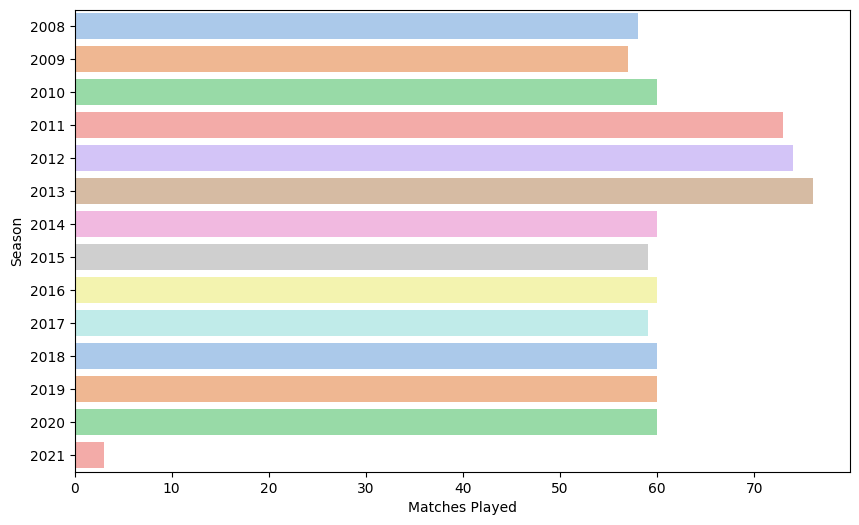

In [8]:
plt.figure(figsize=(10,6))
data=df.groupby(['match_id','season']).count().index.droplevel(level=0).value_counts().sort_index()

sns.barplot(y=data.index,x=data,orient='h',palette="pastel")
plt.xlabel('Matches Played')
plt.ylabel('Season')
plt.show()

In [9]:
# most ipl matches played in venue

df.groupby(['venue','match_id']).count().droplevel(level=1).index.value_counts()

venue
M.Chinnaswamy Stadium                                   80
Eden Gardens                                            77
Wankhede Stadium, Mumbai                                74
Arun Jaitley Stadium                                    74
Rajiv Gandhi International Stadium, Uppal               64
MA Chidambaram Stadium, Chepauk, Chennai                59
Punjab Cricket Association IS Bindra Stadium, Mohali    56
Sawai Mansingh Stadium                                  47
Dubai International Cricket Stadium                     33
Sheikh Zayed Stadium                                    29
Maharashtra Cricket Association Stadium                 21
Sharjah Cricket Stadium                                 18
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Kingsmead                                               15
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     13
SuperSport Park                                   

In [10]:
data=df['bowling_team'].value_counts().sort_values(ascending=False)
data

bowling_team
Mumbai Indians                 24607
Royal Challengers Bangalore    23167
Kolkata Knight Riders          22727
Kings XI Punjab                22483
Chennai Super Kings            21344
Rajasthan Royals               19120
Delhi Daredevils               18725
Sunrisers Hyderabad            14839
Deccan Chargers                 9039
Pune Warriors                   5457
Delhi Capitals                  4144
Gujarat Lions                   3545
Rising Pune Supergiant          3543
Kochi Tuskers Kerala            1614
Name: count, dtype: int64

C:\Users\SUMIT PRAJAPATI\AppData\Local\Temp\ipykernel_3104\2566222704.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=data.index,x=data,orient='h',palette='deep')


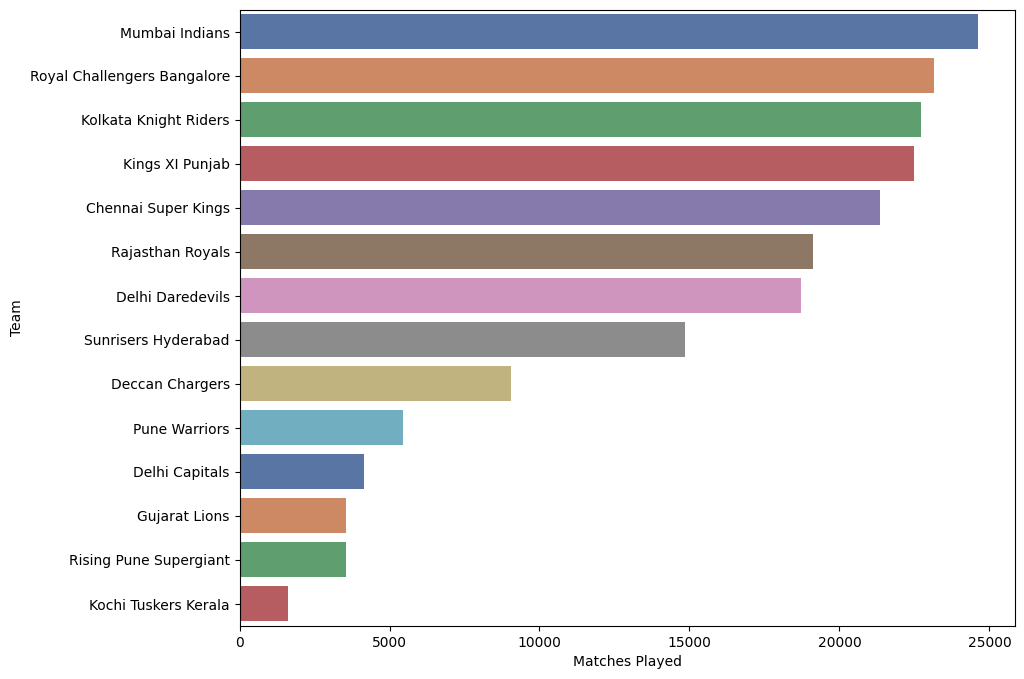

In [11]:
#IPL matches played by each teams
plt.figure(figsize=(10,8))
data=df['bowling_team'].value_counts().sort_values(ascending=False)
sns.barplot(y=data.index,x=data,orient='h',palette='deep')
plt.xlabel('Matches Played')
plt.ylabel('Team')
plt.show()

In [12]:
#Most run scored by IPL Teams
df.groupby(['batting_team'])['run'].sum().sort_values(ascending=False)

batting_team
Mumbai Indians                 32488
Royal Challengers Bangalore    30415
Kings XI Punjab                30064
Kolkata Knight Riders          29606
Chennai Super Kings            28560
Rajasthan Royals               24542
Delhi Daredevils               24296
Sunrisers Hyderabad            19539
Deccan Chargers                11463
Pune Warriors                   6358
Delhi Capitals                  5499
Gujarat Lions                   4862
Rising Pune Supergiant          4533
Kochi Tuskers Kerala            1901
Name: run, dtype: int64

In [13]:
data=df.groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending=False).head(10)
data

striker
V Kohli           5921
SK Raina          5430
S Dhawan          5282
DA Warner         5257
RG Sharma         5251
AB de Villiers    4916
CH Gayle          4804
MS Dhoni          4632
RV Uthappa        4609
G Gambhir         4217
Name: runs_off_bat, dtype: int64

C:\Users\SUMIT PRAJAPATI\AppData\Local\Temp\ipykernel_3104\2834085348.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=data.index,x=data,orient='h',palette='dark')


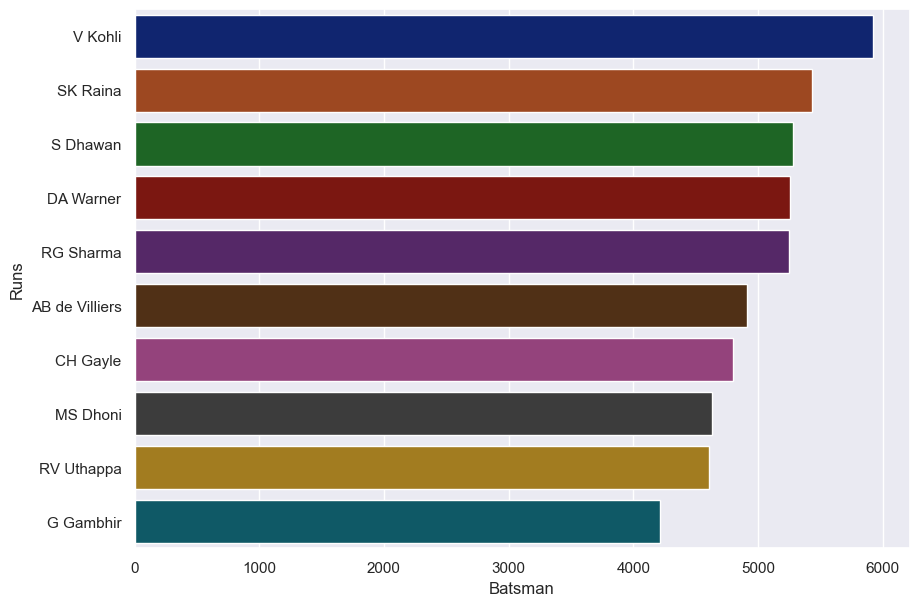

In [80]:
#Most IPL Runs by a batsman

plt.figure(figsize=(10,7))
data=df.groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending=False).head(10)
sns.barplot(y=data.index,x=data,orient='h',palette='dark')
plt.xlabel('Batsman')
plt.ylabel('Runs')
plt.show()

In [15]:
#Avg Run by Teams in powerplay
df[df['over']<6].groupby(['match_id','batting_team']).sum()['run'].groupby('batting_team').mean().sort_values(ascending=False)

batting_team
Gujarat Lions                  51.966667
Kochi Tuskers Kerala           48.571429
Delhi Capitals                 48.176471
Sunrisers Hyderabad            47.856000
Rising Pune Supergiant         47.433333
Kings XI Punjab                47.126316
Kolkata Knight Riders          46.409326
Delhi Daredevils               45.714286
Deccan Chargers                45.560000
Mumbai Indians                 45.529412
Chennai Super Kings            45.195531
Rajasthan Royals               44.912500
Royal Challengers Bangalore    44.826531
Pune Warriors                  42.111111
Name: run, dtype: float64

In [16]:
runs = df.groupby(['striker','match_id'])['runs_off_bat'].sum()

runs

striker         match_id
A Ashish Reddy  548346      10
                548352       3
                548359       8
                548373      10
                548376       4
                            ..
Z Khan          980903       4
                980993       2
                1082595      1
                1082635      2
                1082646      1
Name: runs_off_bat, Length: 12207, dtype: int64

In [17]:
#Most ipl century by player
runs=df.groupby(['striker','match_id'])['runs_off_bat'].sum()
runs[runs>=100].droplevel(level=1).groupby('striker').count().sort_values(ascending=False)[:10]

striker
CH Gayle          6
V Kohli           5
DA Warner         4
SR Watson         4
AB de Villiers    3
V Sehwag          2
AC Gilchrist      2
AM Rahane         2
HM Amla           2
KL Rahul          2
Name: runs_off_bat, dtype: int64

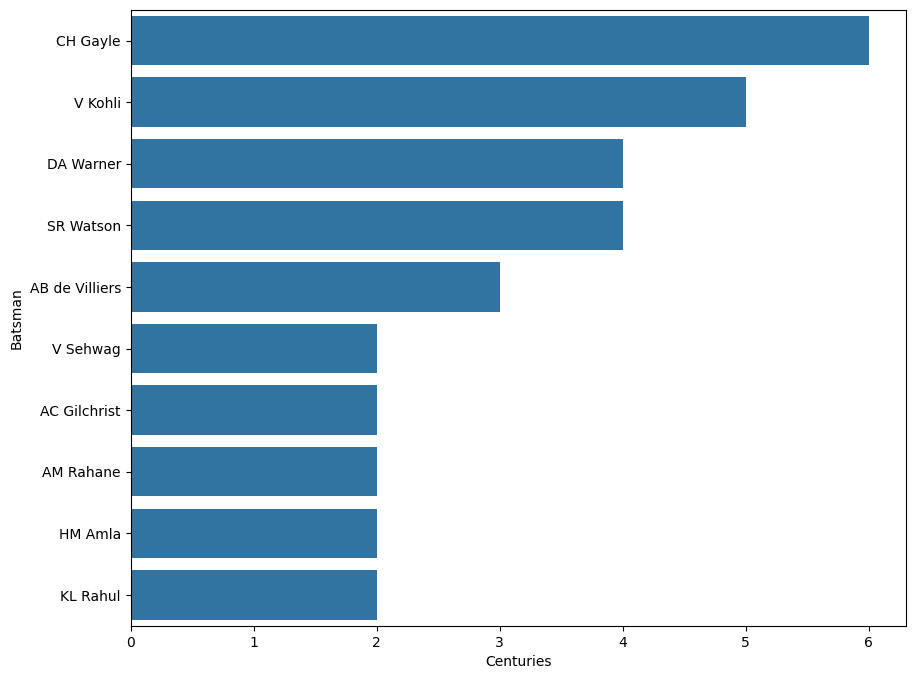

In [18]:
plt.figure(figsize=(10,8))
runs=df.groupby(['striker','match_id'])['runs_off_bat'].sum()
data=runs[runs>=100].droplevel(level=1).groupby('striker').count().sort_values(ascending=False)[:10]
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Centuries')
plt.ylabel('Batsman')
plt.show()

In [19]:
#Most IPL fifty by player
runs=df.groupby(['striker','match_id'])['runs_off_bat'].sum()
runs[runs>=50].droplevel(level=1).groupby('striker').count().sort_values(ascending=False)[:10]

striker
DA Warner         52
V Kohli           45
S Dhawan          44
AB de Villiers    42
SK Raina          40
RG Sharma         40
CH Gayle          38
G Gambhir         36
AM Rahane         30
SR Watson         25
Name: runs_off_bat, dtype: int64

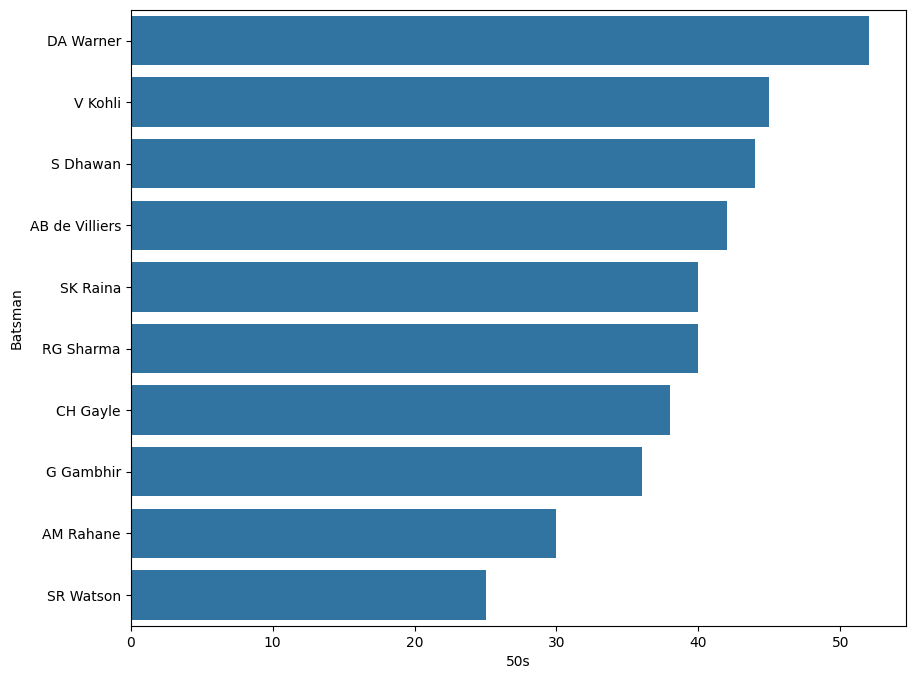

In [20]:
plt.figure(figsize=(10,8))
runs=df.groupby(['striker','match_id'])['runs_off_bat'].sum()
data=runs[runs>=50].droplevel(level=1).groupby('striker').count().sort_values(ascending=False)[:10]
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('50s')
plt.ylabel('Batsman')
plt.show()

In [21]:
#Most sixes by player in single match
df[df['runs_off_bat']==6].groupby(['start_date','striker']).count()['season'].sort_values(ascending=False)[:10]

start_date  striker       
2013-04-23  CH Gayle          17
2008-04-18  BB McCullum       13
2012-05-17  CH Gayle          13
2016-05-14  AB de Villiers    12
2015-05-06  CH Gayle          12
2018-04-19  CH Gayle          11
2008-05-14  ST Jayasuriya     11
2010-04-03  M Vijay           11
2018-04-10  AD Russell        11
2018-04-27  SS Iyer           10
Name: season, dtype: int64

In [22]:
# Most Boundary(4s) hit by a batsman
df[df['runs_off_bat']==4]['striker'].value_counts()[:10]

striker
S Dhawan          601
V Kohli           510
DA Warner         510
SK Raina          496
G Gambhir         492
RG Sharma         459
RV Uthappa        454
AM Rahane         416
AB de Villiers    395
CH Gayle          387
Name: count, dtype: int64

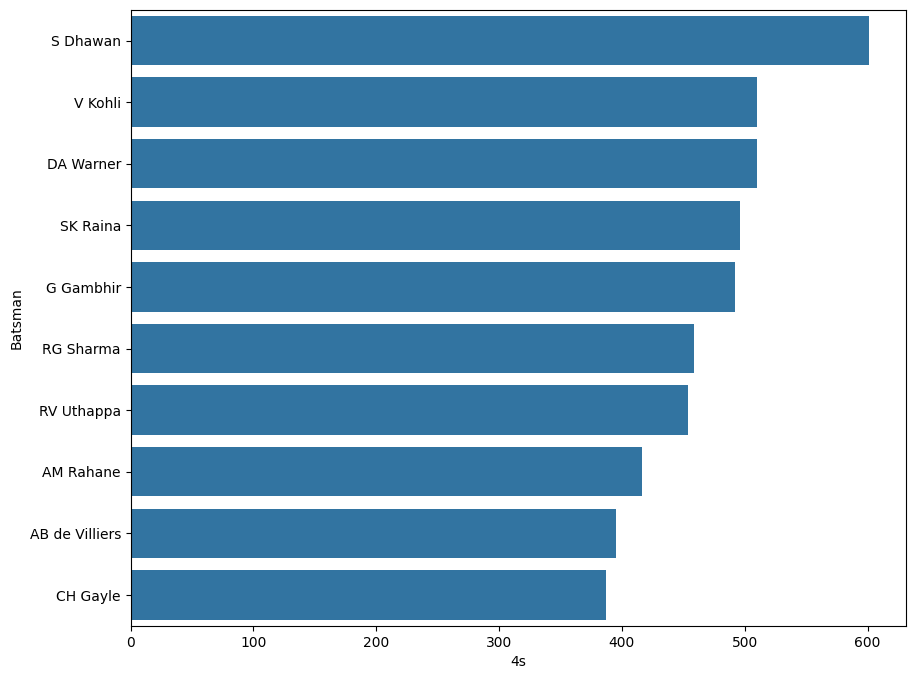

In [23]:
plt.figure(figsize=(10,8))
data=df[df['runs_off_bat']==4]['striker'].value_counts()[:10]
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('4s')
plt.ylabel('Batsman')
plt.show()

In [24]:
#Most runs in an IPL season by player
df.groupby(['striker','season'])['runs_off_bat'].sum().sort_values(ascending=False)[:10]

striker         season
V Kohli         2016      973
DA Warner       2016      848
KS Williamson   2018      735
CH Gayle        2012      733
MEK Hussey      2013      733
CH Gayle        2013      720
DA Warner       2019      692
AB de Villiers  2016      687
RR Pant         2018      684
KL Rahul        2020      676
Name: runs_off_bat, dtype: int64

In [25]:
#no of sixes in IPL season
df[df['runs_off_bat']==6].groupby('season').count()['match_id'].sort_values(ascending=False)

season
2018    872
2019    786
2020    736
2012    733
2014    715
2017    706
2015    692
2013    681
2016    639
2011    639
2008    623
2010    587
2009    508
2021     43
Name: match_id, dtype: int64

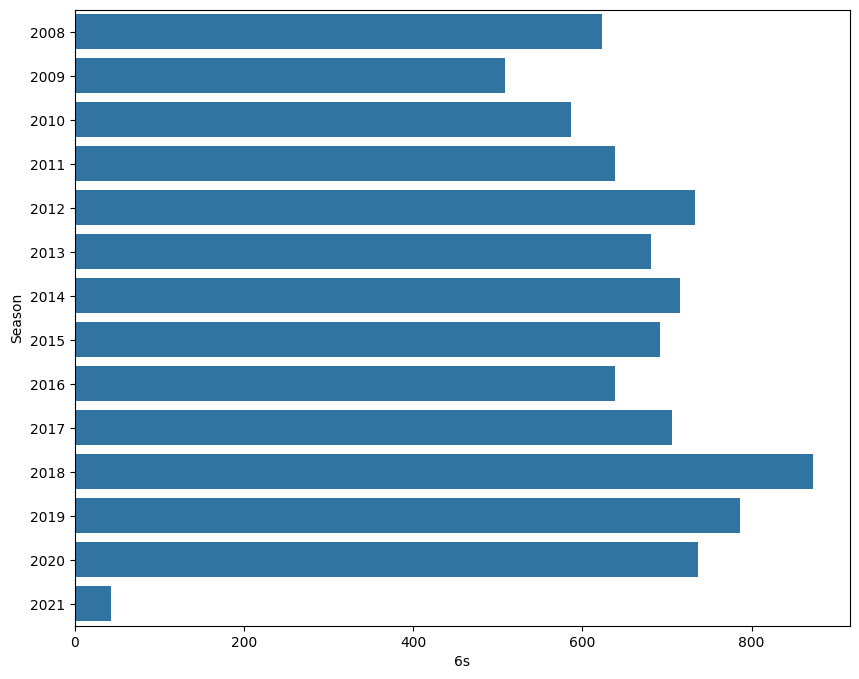

In [26]:
plt.figure(figsize=(10,8))
data=df[df['runs_off_bat']==6].groupby('season').count()['match_id'].sort_values(ascending=False)
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('6s')
plt.ylabel('Season')
plt.show()

In [27]:
#Highest Total by IPL Teams
df.groupby(['start_date','batting_team']).sum()['run'].droplevel(level=0).sort_values(ascending=False)[:10]

batting_team
Royal Challengers Bangalore    263
Royal Challengers Bangalore    248
Chennai Super Kings            246
Kolkata Knight Riders          245
Chennai Super Kings            240
Royal Challengers Bangalore    235
Kings XI Punjab                232
Kolkata Knight Riders          232
Sunrisers Hyderabad            231
Delhi Daredevils               231
Name: run, dtype: int64

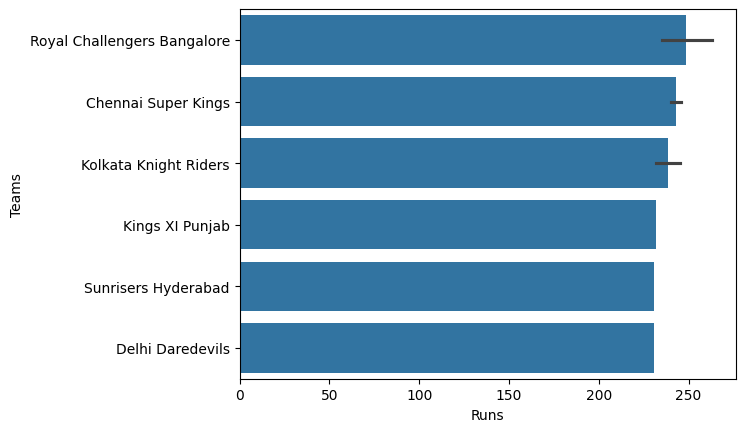

In [28]:
data=df.groupby(['start_date','batting_team']).sum()['run'].droplevel(level=0).sort_values(ascending=False)[:10]
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Runs')
plt.ylabel('Teams')
plt.show()

In [29]:
#Most IPL sixes Hit by a batsman
df[df['runs_off_bat']==6]['striker'].value_counts()[:10]

striker
CH Gayle          351
AB de Villiers    239
MS Dhoni          216
RG Sharma         215
V Kohli           202
KA Pollard        199
SK Raina          199
DA Warner         195
SR Watson         190
RV Uthappa        163
Name: count, dtype: int64

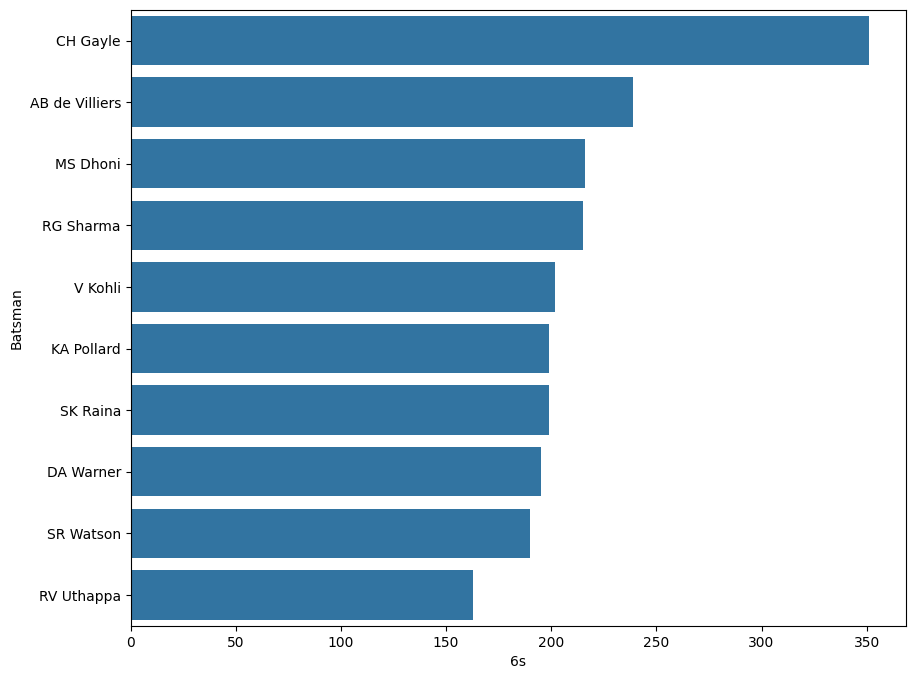

In [30]:
plt.figure(figsize=(10,8))
data=df[df['runs_off_bat']==6]['striker'].value_counts()[:10]
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('6s')
plt.ylabel('Batsman')
plt.show()

In [31]:
#Highest individual score 
df.groupby(['striker','start_date'])['runs_off_bat'].sum().sort_values(ascending=False)[:10]

striker         start_date
CH Gayle        2013-04-23    175
BB McCullum     2008-04-18    158
AB de Villiers  2015-05-10    133
KL Rahul        2020-09-24    132
AB de Villiers  2016-05-14    129
RR Pant         2018-05-10    128
CH Gayle        2012-05-17    128
M Vijay         2010-04-03    127
DA Warner       2017-04-30    126
V Sehwag        2014-05-30    122
Name: runs_off_bat, dtype: int64

In [32]:
#most runs conducded by a bowler in one inning
df.groupby(['bowler','start_date'])['run'].sum().droplevel(level=1).sort_values(ascending=False)[:10] 

bowler
Basil Thampi        70
I Sharma            66
Sandeep Sharma      66
Mujeeb Ur Rahman    66
PJ Cummins          65
UT Yadav            65
S Kaul              64
AS Rajpoot          64
AB Dinda            63
VR Aaron            63
Name: run, dtype: int64

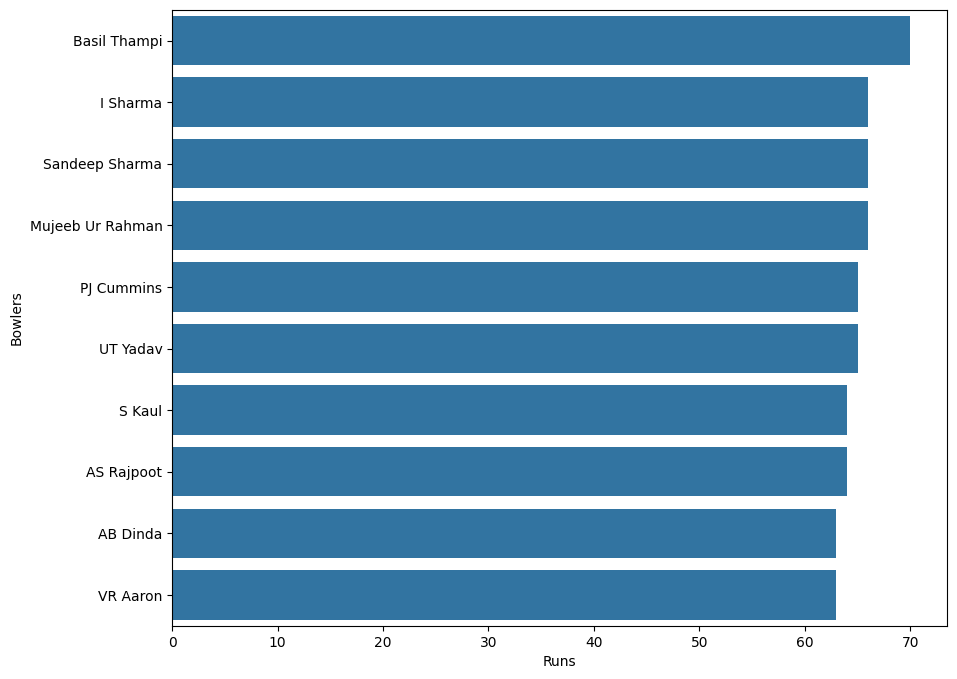

In [33]:
plt.figure(figsize=(10,8))
data=df.groupby(['bowler','start_date'])['run'].sum().droplevel(level=1).sort_values(ascending=False)[:10]
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Runs')
plt.ylabel('Bowlers')
plt.show()

In [34]:
#Most Dot ball by a bowler
df[df['run']==0].groupby('bowler').count()['match_id'].sort_values(ascending=False)[:10]

bowler
Harbhajan Singh    1247
R Ashwin           1174
B Kumar            1165
SL Malinga         1144
PP Chawla          1137
A Mishra           1129
SP Narine          1100
P Kumar            1075
DW Steyn           1019
UT Yadav            955
Name: match_id, dtype: int64

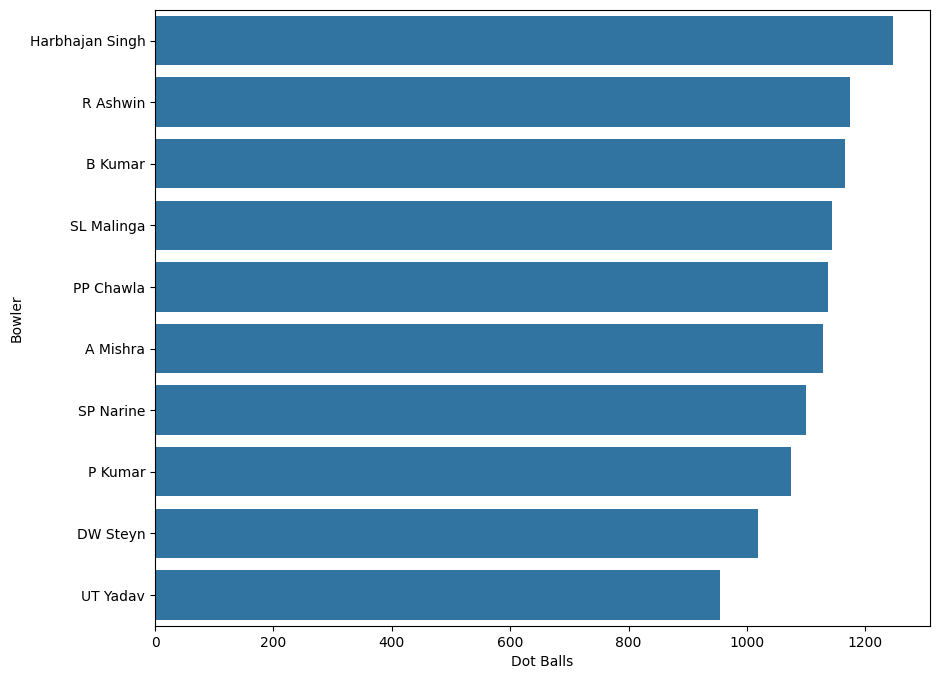

In [35]:
plt.figure(figsize=(10,8))
data=df[df['run']==0].groupby('bowler').count()['match_id'].sort_values(ascending=False)[:10]
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Dot Balls')
plt.ylabel('Bowler')
plt.show()

In [36]:
#Most IPL Wickets by a bowler
lst='caught,bowled,lbw,stumped,caught and bowled,hit wicket'
df[df['wicket_type'].apply(lambda x: True if x in lst and x!=' ' else False)]['bowler'].value_counts()[:10]

bowler
SL Malinga         170
A Mishra           160
PP Chawla          156
DJ Bravo           154
Harbhajan Singh    150
R Ashwin           139
B Kumar            137
SP Narine          127
YS Chahal          121
UT Yadav           119
Name: count, dtype: int64

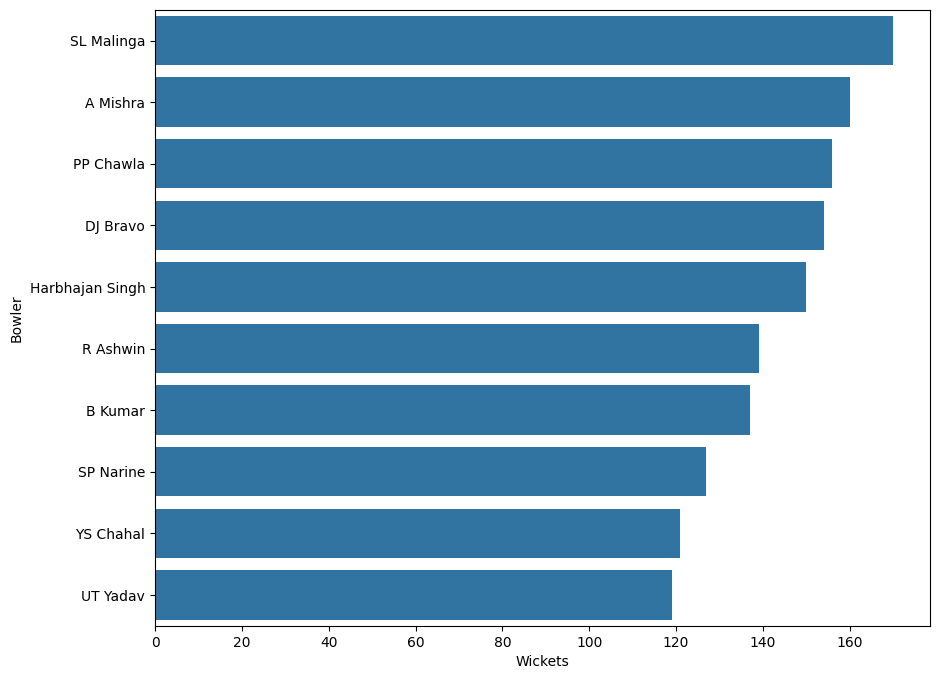

In [37]:
plt.figure(figsize=(10,8))
lst='caught,bowled,lbw,stumped,caught and bowled,hit wicket'
data=df[df['wicket_type'].apply(lambda x: True if x in lst and x!=' ' else False)]['bowler'].value_counts()[:10]
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Wickets')
plt.ylabel('Bowler')
plt.show()

In [38]:
df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'wicket_type', 'player_dismissed', 'run', 'over'],
      dtype='object')

In [39]:
#Most IPL Wickets by a bowler
lst='caught,bowled,lbw,stumped,caught and bowled,hit wicket'
d=df[df['wicket_type'].apply(lambda x: True if x in lst and x!=' ' else False)]
d

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,runs_off_bat,extras,wides,noballs,byes,legbyes,wicket_type,player_dismissed,run,over
33,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,5.2,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,0,0,0.0,0.0,0.0,0.0,caught,SC Ganguly,0,5
74,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,12.1,Kolkata Knight Riders,Royal Challengers Bangalore,RT Ponting,BB McCullum,...,0,0,0.0,0.0,0.0,0.0,caught,RT Ponting,0,12
106,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,17.1,Kolkata Knight Riders,Royal Challengers Bangalore,DJ Hussey,BB McCullum,...,0,0,0.0,0.0,0.0,0.0,caught,DJ Hussey,0,17
131,335982,2008,2008-04-18,M.Chinnaswamy Stadium,2,1.1,Royal Challengers Bangalore,Kolkata Knight Riders,R Dravid,W Jaffer,...,0,0,0.0,0.0,0.0,0.0,bowled,R Dravid,0,1
138,335982,2008,2008-04-18,M.Chinnaswamy Stadium,2,2.2,Royal Challengers Bangalore,Kolkata Knight Riders,V Kohli,W Jaffer,...,0,0,0.0,0.0,0.0,0.0,bowled,V Kohli,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194237,1254060,2021,2021-04-11,"MA Chidambaram Stadium, Chepauk, Chennai",2,1.3,Sunrisers Hyderabad,Kolkata Knight Riders,DA Warner,WP Saha,...,0,0,0.0,0.0,0.0,0.0,caught,DA Warner,0,1
194241,1254060,2021,2021-04-11,"MA Chidambaram Stadium, Chepauk, Chennai",2,2.1,Sunrisers Hyderabad,Kolkata Knight Riders,WP Saha,MK Pandey,...,0,0,0.0,0.0,0.0,0.0,bowled,WP Saha,0,2
194308,1254060,2021,2021-04-11,"MA Chidambaram Stadium, Chepauk, Chennai",2,12.6,Sunrisers Hyderabad,Kolkata Knight Riders,JM Bairstow,MK Pandey,...,0,0,0.0,0.0,0.0,0.0,caught,JM Bairstow,0,12
194328,1254060,2021,2021-04-11,"MA Chidambaram Stadium, Chepauk, Chennai",2,15.8,Sunrisers Hyderabad,Kolkata Knight Riders,Mohammad Nabi,MK Pandey,...,0,0,0.0,0.0,0.0,0.0,caught,Mohammad Nabi,0,15


In [40]:
#Most Maiden over by a bowler
data=df.groupby(['start_date','bowler','over'])['run'].sum()
data=data[data.values==0].droplevel(level=[0,2])
data.index.value_counts()[:10]

bowler
P Kumar           12
IK Pathan          9
SL Malinga         8
DW Steyn           8
DS Kulkarni        7
B Kumar            7
DJ Bravo           6
Sandeep Sharma     6
R Ashwin           5
DL Chahar          5
Name: count, dtype: int64

In [41]:
#Most wickets by an IPL team
lst='caught,bowled,lbw,stumped,caught and bowled,hit wicket'
df[df['wicket_type'].apply(lambda x: True if x in lst and x!=' ' else False)]['bowling_team'].value_counts()

bowling_team
Mumbai Indians                 1139
Royal Challengers Bangalore    1020
Chennai Super Kings            1009
Kings XI Punjab                 982
Kolkata Knight Riders           981
Rajasthan Royals                828
Delhi Daredevils                795
Sunrisers Hyderabad             689
Deccan Chargers                 408
Pune Warriors                   219
Delhi Capitals                  207
Rising Pune Supergiant          170
Gujarat Lions                   133
Kochi Tuskers Kerala             62
Name: count, dtype: int64

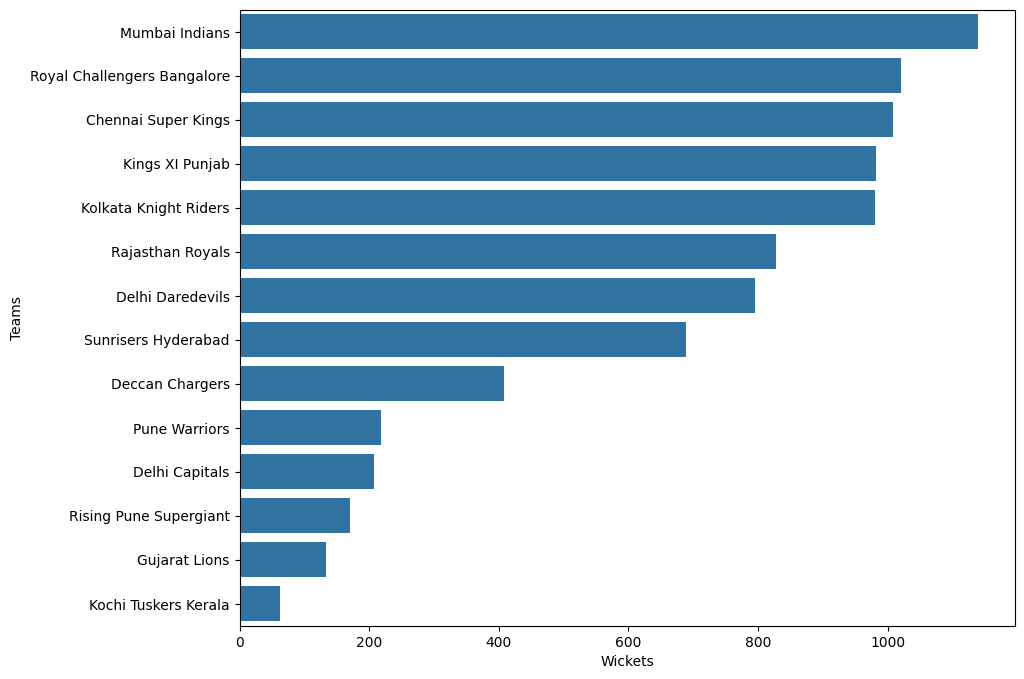

In [42]:
#Most wickets by an IPL team
plt.figure(figsize=(10,8))
lst='caught,bowled,lbw,stumped,caught and bowled,hit wicket'
data=df[df['wicket_type'].apply(lambda x: True if x in lst and x!=' ' else False)]['bowling_team'].value_counts()
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Wickets')
plt.ylabel('Teams')
plt.show()

In [43]:
#Most No Balls by an IPL team

df.groupby(['batting_team'])['noballs'].agg('sum').sort_values(ascending=False)

batting_team
Royal Challengers Bangalore    106.0
Chennai Super Kings             96.0
Mumbai Indians                  96.0
Rajasthan Royals                94.0
Kolkata Knight Riders           90.0
Delhi Daredevils                73.0
Kings XI Punjab                 71.0
Sunrisers Hyderabad             53.0
Deccan Chargers                 49.0
Pune Warriors                   24.0
Delhi Capitals                  21.0
Gujarat Lions                   17.0
Kochi Tuskers Kerala            11.0
Rising Pune Supergiant           8.0
Name: noballs, dtype: float64

In [44]:
#Most Extra Run by an IPL team

df.groupby(['batting_team'])['extras'].agg('sum').sort_values(ascending=False)

batting_team
Mumbai Indians                 1746
Kolkata Knight Riders          1628
Kings XI Punjab                1523
Royal Challengers Bangalore    1485
Chennai Super Kings            1420
Delhi Daredevils               1274
Rajasthan Royals               1182
Sunrisers Hyderabad             951
Deccan Chargers                 578
Pune Warriors                   318
Gujarat Lions                   233
Delhi Capitals                  227
Rising Pune Supergiant          201
Kochi Tuskers Kerala            143
Name: extras, dtype: int64

In [45]:
player=(df['striker']=='V Kohli')
df2=df[player]
df2.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,runs_off_bat,extras,wides,noballs,byes,legbyes,wicket_type,player_dismissed,run,over
132,335982,2008,2008-04-18,M.Chinnaswamy Stadium,2,1.2,Royal Challengers Bangalore,Kolkata Knight Riders,V Kohli,W Jaffer,...,0,0,0.0,0.0,0.0,0.0,,,0,1
133,335982,2008,2008-04-18,M.Chinnaswamy Stadium,2,1.3,Royal Challengers Bangalore,Kolkata Knight Riders,V Kohli,W Jaffer,...,0,4,0.0,0.0,0.0,4.0,,,4,1
134,335982,2008,2008-04-18,M.Chinnaswamy Stadium,2,1.4,Royal Challengers Bangalore,Kolkata Knight Riders,V Kohli,W Jaffer,...,1,0,0.0,0.0,0.0,0.0,,,1,1
137,335982,2008,2008-04-18,M.Chinnaswamy Stadium,2,2.1,Royal Challengers Bangalore,Kolkata Knight Riders,V Kohli,W Jaffer,...,0,0,0.0,0.0,0.0,0.0,,,0,2
138,335982,2008,2008-04-18,M.Chinnaswamy Stadium,2,2.2,Royal Challengers Bangalore,Kolkata Knight Riders,V Kohli,W Jaffer,...,0,0,0.0,0.0,0.0,0.0,bowled,V Kohli,0,2


In [46]:
lst='caught,bowled,lbw,stumped,caught and bowled,hit wicket,retired hurt,obstructing the field,run out'
d=df2[df2['wicket_type'].apply(lambda x: True if x in lst and x!=' ' else False)]['wicket_type'].value_counts()
d

wicket_type
caught               105
bowled                30
run out               15
lbw                    8
stumped                3
caught and bowled      3
Name: count, dtype: int64

In [47]:
player=(df['striker']=='MS Dhoni')
df3=df[player]
df3.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,runs_off_bat,extras,wides,noballs,byes,legbyes,wicket_type,player_dismissed,run,over
265,335983,2008,2008-04-19,"Punjab Cricket Association IS Bindra Stadium, ...",1,6.3,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,...,1,0,0.0,0.0,0.0,0.0,,,1,6
268,335983,2008,2008-04-19,"Punjab Cricket Association IS Bindra Stadium, ...",1,6.6,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,...,1,0,0.0,0.0,0.0,0.0,,,1,6
269,335983,2008,2008-04-19,"Punjab Cricket Association IS Bindra Stadium, ...",1,7.1,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,...,0,0,0.0,0.0,0.0,0.0,lbw,MS Dhoni,0,7
1719,335989,2008,2008-04-23,"MA Chidambaram Stadium, Chepauk, Chennai",1,15.1,Chennai Super Kings,Mumbai Indians,MS Dhoni,ML Hayden,...,0,1,1.0,0.0,0.0,0.0,,,1,15
1720,335989,2008,2008-04-23,"MA Chidambaram Stadium, Chepauk, Chennai",1,15.2,Chennai Super Kings,Mumbai Indians,MS Dhoni,ML Hayden,...,4,0,0.0,0.0,0.0,0.0,,,4,15


In [48]:
lst='caught,bowled,lbw,stumped,caught and bowled,hit wicket,retired hurt,obstructing the field,run out'
m=df3[df3['wicket_type'].apply(lambda x: True if x in lst and x!=' ' else False)]['wicket_type'].value_counts()
m

wicket_type
caught               76
run out              22
bowled               17
lbw                   5
caught and bowled     4
stumped               3
Name: count, dtype: int64

In [49]:
ball_data=pd.read_csv("IPL Ball-by-Ball 2008-2020.csv")
matches_data=pd.read_csv("IPL Matches 2008-2020.csv")

In [50]:
matches_data

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


In [51]:
matches_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [52]:
ball_data.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [53]:
matches_data.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [54]:
ball_data.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [55]:
matches_data.shape

(816, 17)

In [56]:
ball_data.shape

(193468, 18)

In [57]:
matches_data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [58]:
print("Matches played so far:-",matches_data.shape[0])

Matches played so far:- 816


In [59]:
print("\n Cities played at:-",matches_data['city'].unique())


 Cities played at:- ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah']


In [60]:
print("\n Team participated:-",matches_data['team1'].unique())


 Team participated:- ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals']


In [61]:
ball_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [62]:
matches_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [63]:
matches_data['Session']=pd.DatetimeIndex(matches_data['date']).year

In [64]:
matches_data['Month']=pd.DatetimeIndex(matches_data['date']).month

In [65]:
match_per_session=matches_data.groupby('Session')['id'].count().reset_index().rename(columns={'id':'Matches'})
match_per_session

,Session,Matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


In [66]:
session_data=matches_data[['id', 'Session']].merge(ball_data,left_on='id',right_on='id',how='left').drop('id',axis=1)
session_data

,Session,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,2020,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,2020,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,2020,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,2020,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


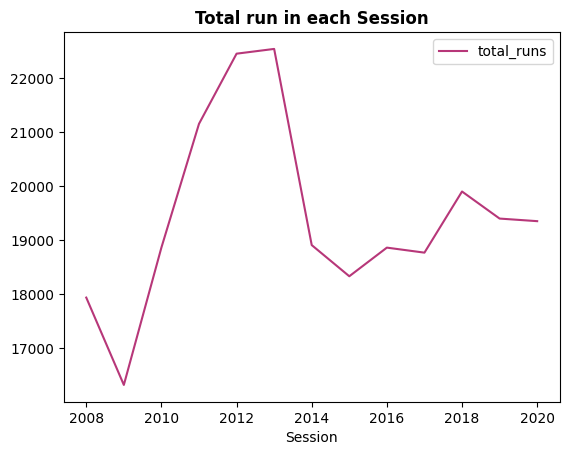

In [67]:
session=session_data.groupby(['Session'])['total_runs'].sum().reset_index()
p = session.set_index('Session')

sns.lineplot(data=p, palette="magma")
plt.title("Total run in each Session", fontsize=12, fontweight='bold')
plt.show()

In [68]:
run_per_session=pd.concat([match_per_session,session.iloc[:,1]],axis=1)
run_per_session

,Session,Matches,total_runs
0,2008,58,17937
1,2009,57,16320
2,2010,60,18864
3,2011,73,21154
4,2012,74,22453
5,2013,76,22541
6,2014,60,18909
7,2015,59,18332
8,2016,60,18862
9,2017,59,18769


In [69]:
run_per_session=pd.concat([match_per_session,session.iloc[:,1]],axis=1)
run_per_session['Run scored per match']=run_per_session['total_runs']/run_per_session['Matches']
run_per_session.set_index('Session', inplace=True)
run_per_session

,Matches,total_runs,Run scored per match
Session,,,
2008,58,17937,309.258621
2009,57,16320,286.315789
2010,60,18864,314.400000
2011,73,21154,289.780822
2012,74,22453,303.418919
2013,76,22541,296.592105
2014,60,18909,315.150000
2015,59,18332,310.711864
2016,60,18862,314.366667


C:\Users\SUMIT PRAJAPATI\AppData\Local\Temp\ipykernel_3104\1147113769.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=toss.index,x=toss,orient='h', palette='icefire')


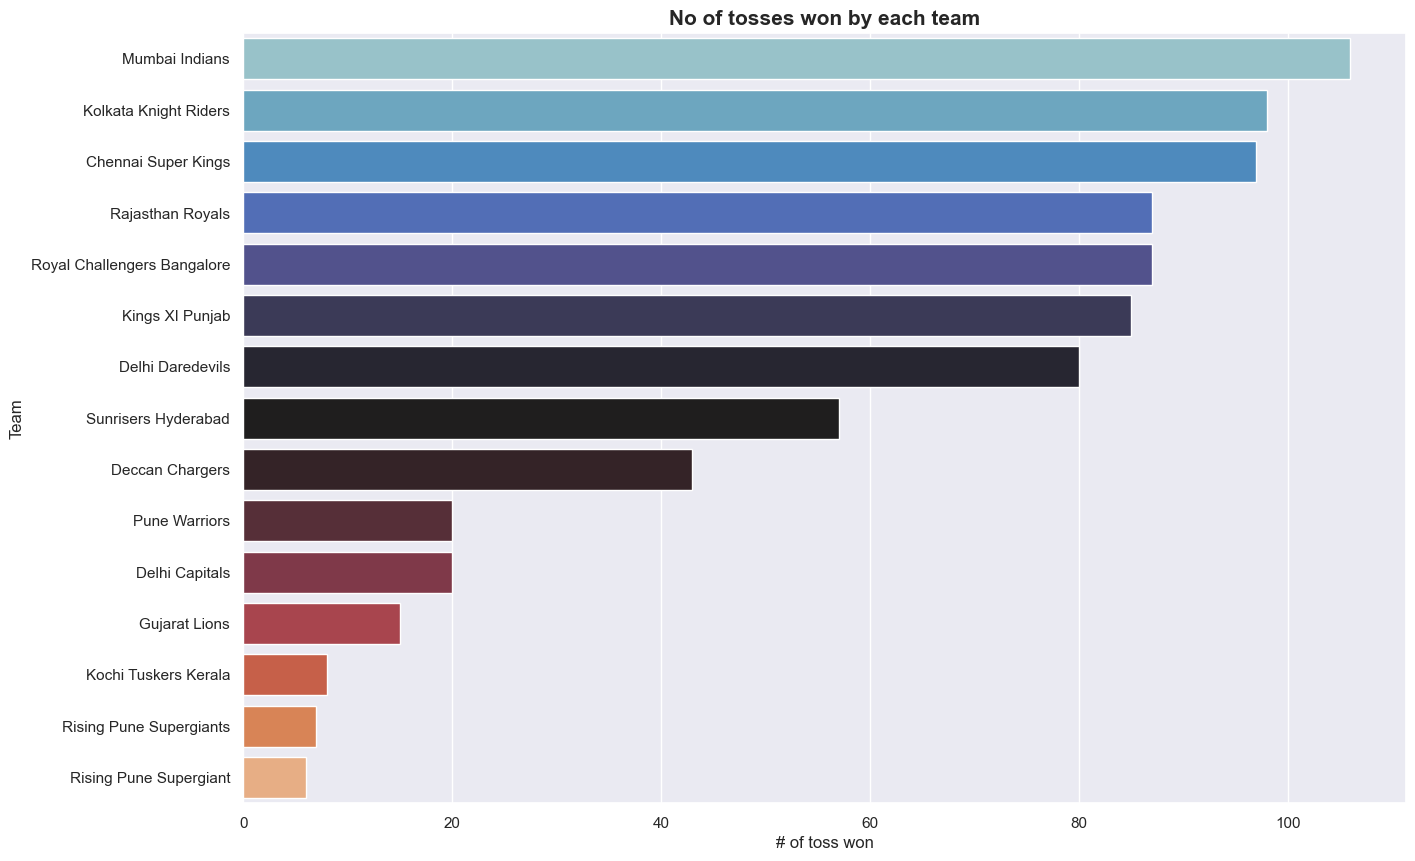

In [70]:
toss=matches_data['toss_winner'].value_counts()

sns.set_theme(rc={'figure.figsize':(15,10)},style='darkgrid')
plt.title("No of tosses won by each team", fontsize=15, fontweight='bold')
sns.barplot(y=toss.index,x=toss,orient='h', palette='icefire')
plt.xlabel('# of toss won')
plt.ylabel('Team')
plt.show()

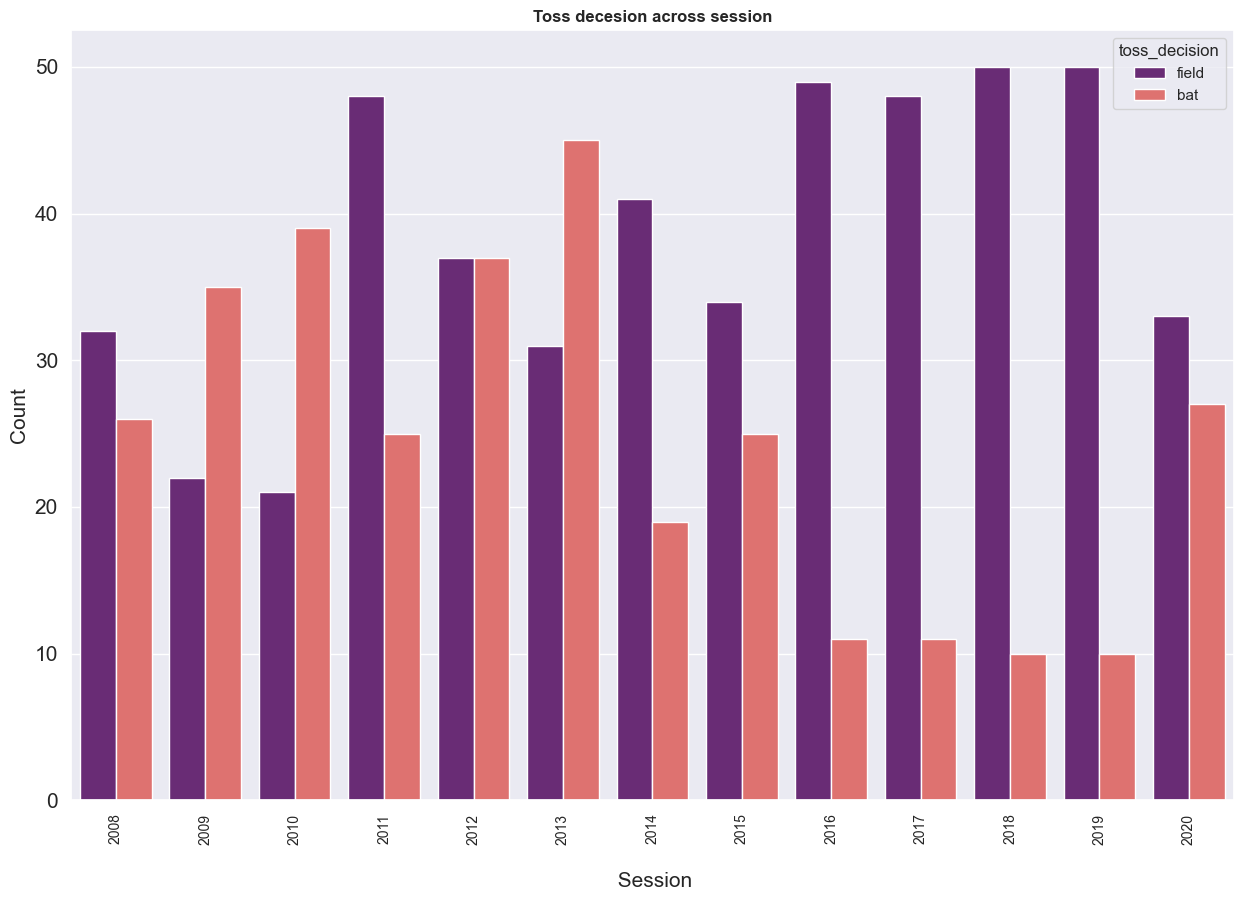

In [71]:
sns.countplot(x='Session', hue='toss_decision', data=matches_data, palette="magma")
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel('\n Session', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Toss decesion across session', fontsize=12, fontweight='bold')
plt.show()

In [72]:
matches_data['result'].value_counts()

result
wickets    435
runs       364
tie         13
Name: count, dtype: int64

In [73]:
matches_data.venue[matches_data.result!='runs'].mode()

0    Eden Gardens
Name: venue, dtype: object

In [74]:
matches_data.venue[matches_data.result!='wickets'].mode()

0    Feroz Shah Kotla
Name: venue, dtype: object

In [75]:
matches_data.winner[matches_data.result!='runs'].mode()

0    Kolkata Knight Riders
1           Mumbai Indians
Name: winner, dtype: object

In [76]:
p=[]
for i in toss:
    if(i==True):
        p.append(i)

len(p)

0

In [77]:
p1=[]
for i in toss:
    if(i==False):
        p1.append(i)

len(p1)

0

In [78]:
player=(ball_data['batsman']=='SK Raina')
df_raina=ball_data[player]
df_raina.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
246,335983,1,10,3,SK Raina,MEK Hussey,PP Chawla,2,0,2,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
247,335983,1,10,4,SK Raina,MEK Hussey,PP Chawla,0,0,0,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
248,335983,1,10,5,SK Raina,MEK Hussey,PP Chawla,6,0,6,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
249,335983,1,10,6,SK Raina,MEK Hussey,PP Chawla,4,0,4,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
253,335983,1,11,4,SK Raina,MEK Hussey,K Goel,6,0,6,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab


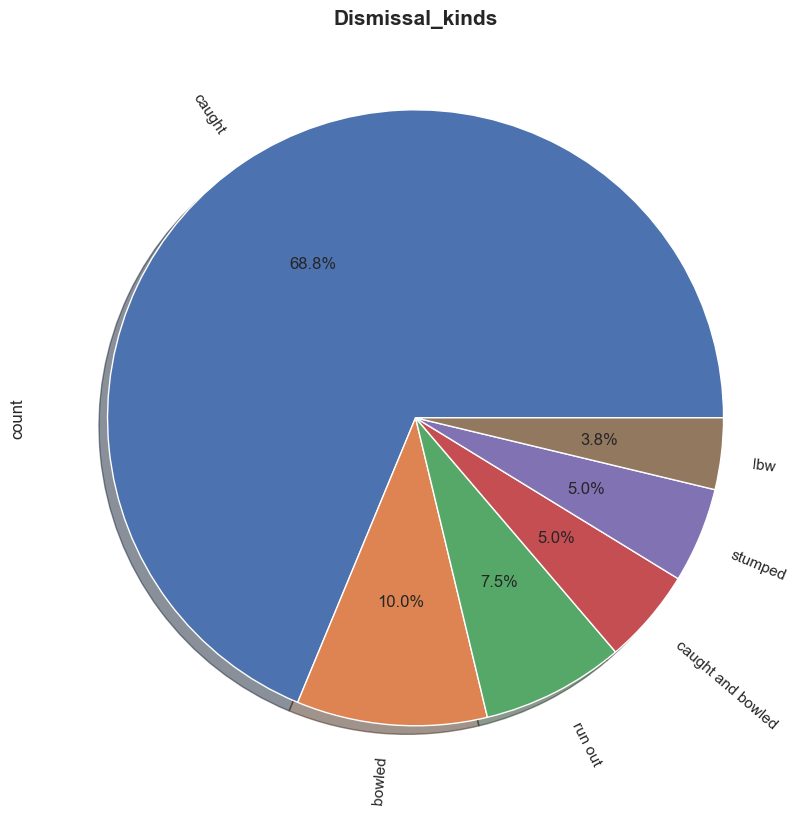

In [79]:
df_raina['dismissal_kind'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, rotatelabels=True)
plt.title('Dismissal_kinds', fontweight='bold', fontsize=15)
plt.show()